In [1]:
#Importing required Libarires
import pandas as pd #importing pandas for data manipulaton
import numpy as np #importing numpy 
import matplotlib.pyplot as plt #for data visualizing
import seaborn as sns


sns.set()

In [2]:
#Loading the dataset using pandas as our dataset is in xlsx format we have to load our dataset using pandas
train_data=pd.read_excel("Data_Train.xlsx")
train_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
pd.set_option('display.max_columns',None)

In [4]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
#checking the shape of the dataset
train_data.shape

(10683, 11)

In [6]:
#checking the datatype
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
train_data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [9]:
#AS most of the columns have object type means "STRING" datatype
#so our Model do not unserstand this type so we convert the datatype of required columns Like Duration,dep_Time,Route,etc.
train_data["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [10]:
train_data["Destination"].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [11]:
train_data.notnull().count()

Airline            10683
Date_of_Journey    10683
Source             10683
Destination        10683
Route              10683
Dep_Time           10683
Arrival_Time       10683
Duration           10683
Total_Stops        10683
Additional_Info    10683
Price              10683
dtype: int64

In [12]:
#checking if there is any Null values 
train_data.isnull().value_counts()

Airline  Date_of_Journey  Source  Destination  Route  Dep_Time  Arrival_Time  Duration  Total_Stops  Additional_Info  Price
False    False            False   False        False  False     False         False     False        False            False    10682
                                               True   False     False         False     True         False            False        1
dtype: int64

In [13]:
#there is  null values in columns ROute and Total_stops
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [14]:
#Droping the NA values
train_data.dropna(inplace=True)

In [15]:
#AS u see null values has succesfully removed
train_data.isnull().value_counts()

Airline  Date_of_Journey  Source  Destination  Route  Dep_Time  Arrival_Time  Duration  Total_Stops  Additional_Info  Price
False    False            False   False        False  False     False         False     False        False            False    10682
dtype: int64

In [16]:
train_data.shape

(10682, 11)

In [17]:
#EDA
#here we are going to do Eda we will start  with Date_of_Journey as Date_of_Journey is object type  we are going to convert 
#it into timestamp for our prediction we use to_datetime to covert it datatype which is dtype object 

In [18]:
#dt.day will extract only day from the date
train_data["Journey_day"]=pd.to_datetime(train_data.Date_of_Journey,format="%d/%M/%Y").dt.day
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1


In [19]:
#dt.month will extract only month from the date
train_data["Journey_month"]=pd.to_datetime(train_data.Date_of_Journey,format="%d/%m/%Y").dt.month

In [20]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [21]:
#AS we have extracted Journey_day and Journey_month from Date_of_Journey we don't need  Date_of_Journey anymore
#so We will drop Date_of_Journey
train_data.drop(["Date_of_Journey"], axis = 1,inplace=True)

In [22]:
#as u can see we have drop Date_of_journey from our Dataset
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [23]:
#Departure time when flight takeoff lands on your destination
#we will extrat values from Dep_Time because 

#Extracting Hours from Dep_Time.
train_data["Dep_hour"]=pd.to_datetime(train_data["Dep_Time"]).dt.hour

#Extracting Minutes from Dep_TIme.
train_data["Dep_Min"]=pd.to_datetime(train_data["Dep_Time"]).dt.minute
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [24]:
#now will drop Dep_Time because we dont it anymore
train_data.drop(["Dep_Time"],axis = 1, inplace=True)

In [25]:
train_data.tail()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_Min
10678,Air Asia,Kolkata,Banglore,CCU → BLR,22:25,2h 30m,non-stop,No info,4107,9,4,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,23:20,2h 35m,non-stop,No info,4145,27,4,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,11:20,3h,non-stop,No info,7229,27,4,8,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,14:10,2h 40m,non-stop,No info,12648,1,3,11,30
10682,Air India,Delhi,Cochin,DEL → GOI → BOM → COK,19:15,8h 20m,2 stops,No info,11753,9,5,10,55


In [26]:
#Arrival time is something when u going to leave or going in the flight
#As we extracted hours and minute from Dep_Time here we will extract hours and minute from arrival_time

#extracting Hour from Arrival_Time
train_data["Arrival_hour"]=pd.to_datetime(train_data["Arrival_Time"]).dt.hour

#extracting Minute from Arrival_Time
train_data["Arrival_min"]=pd.to_datetime(train_data["Arrival_Time"]).dt.minute
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_Min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [27]:
#droping Arrival_Time as it is not useful anymore
train_data.drop(["Arrival_Time"], axis = 1,inplace= True)

In [28]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_Min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [29]:
duration=list(train_data["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration


In [30]:
#Adding duration_hours and Duration_minute into our Tran_data
train_data["Duration_hours"]=duration_hours
train_data["Duration_mins"]=duration_mins
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_Min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [31]:
train_data.drop(["Duration"], axis = 1,inplace=True)


In [32]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_Min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [33]:
train_data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

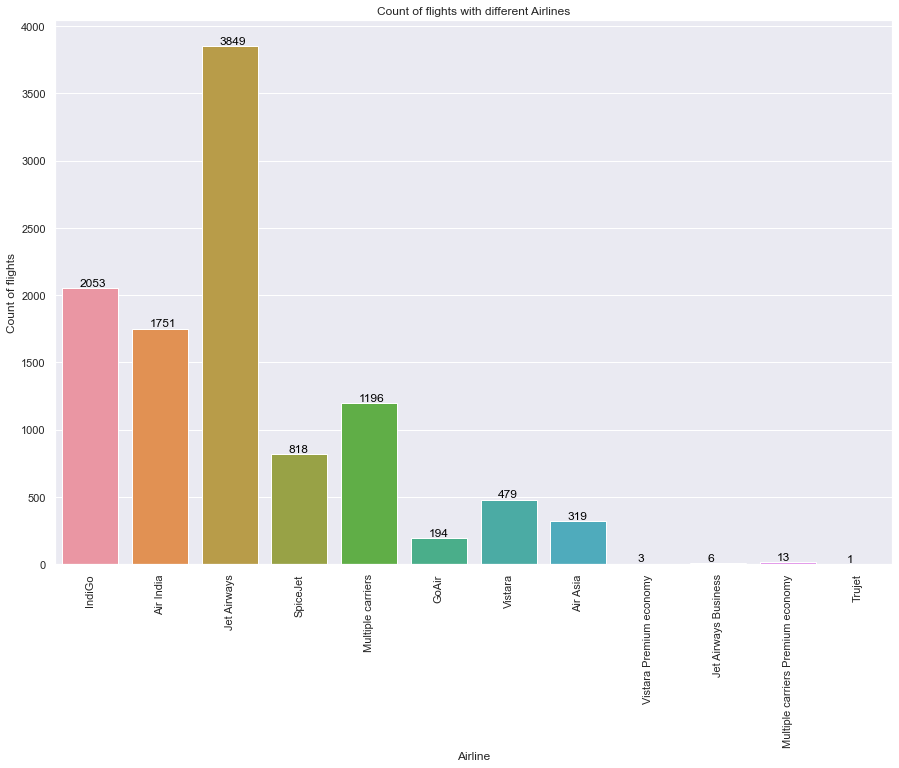

In [34]:
#Count of flight with different Airlines
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =train_data)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

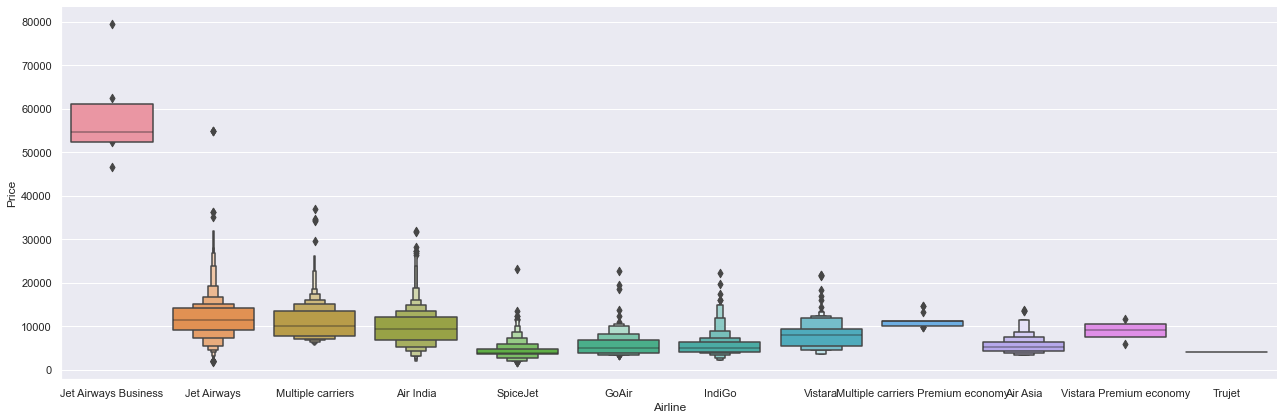

In [35]:
#Airline VS Price
sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

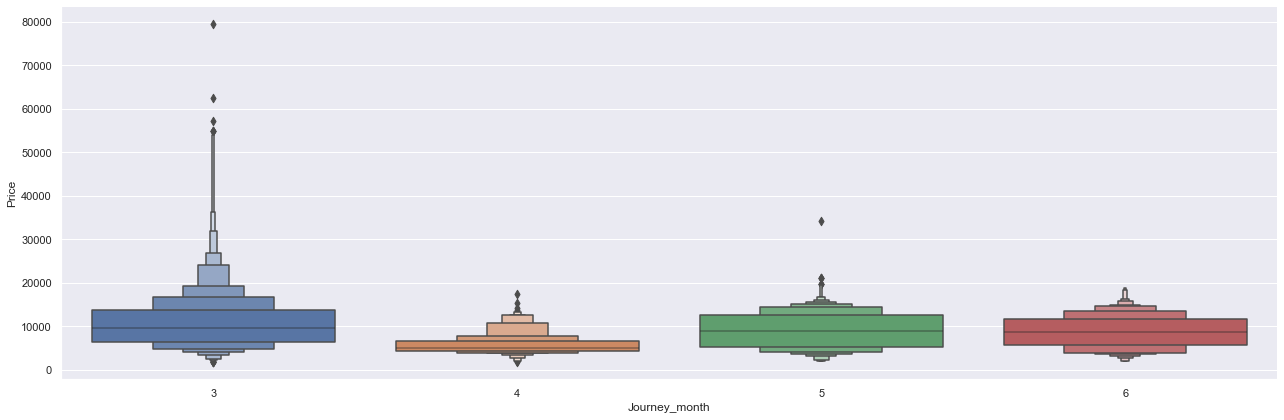

In [36]:
#Airline VS Price IN Each MOnth
sns.catplot(y = "Price", x = "Journey_month", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [37]:
Airline=train_data[["Airline"]]
Airline=pd.get_dummies(Airline)
Airline.head()

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


In [38]:
train_data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

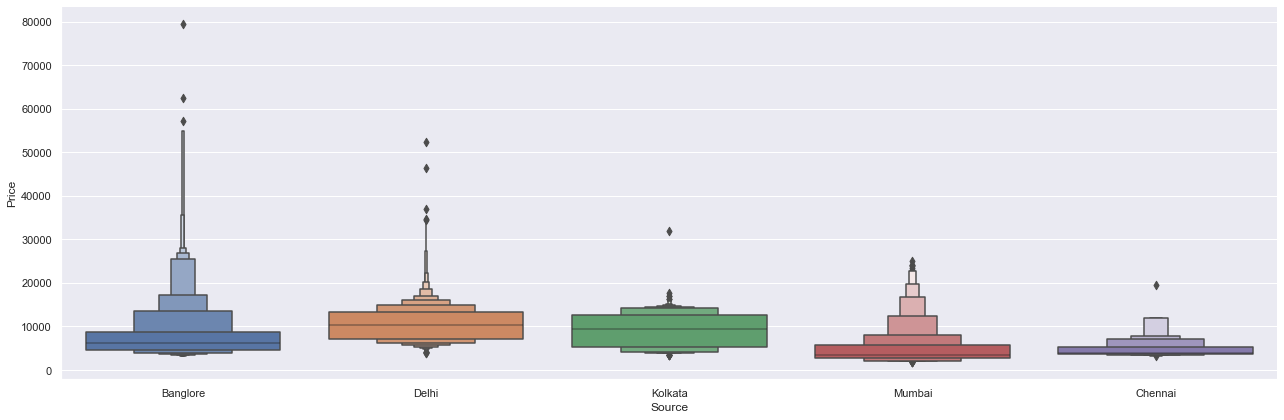

In [39]:
#Price VS Source
sns.catplot(y = "Price", x = "Source", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [40]:
Source=train_data[["Source"]]
Source=pd.get_dummies(Source)
Source.head()
Source

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0
...,...,...,...,...,...
10678,0,0,0,1,0
10679,0,0,0,1,0
10680,1,0,0,0,0
10681,1,0,0,0,0


In [41]:
train_data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

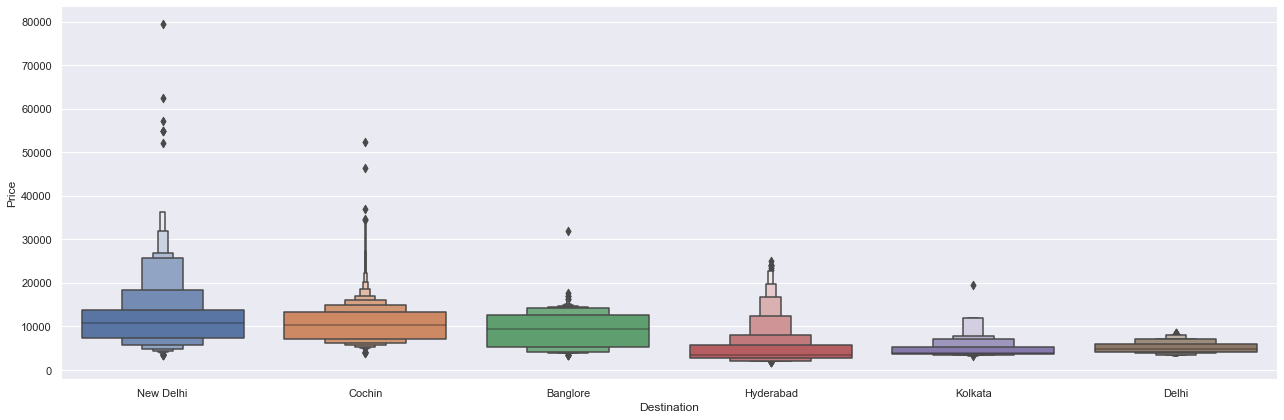

In [42]:
#Price VS Destination
sns.catplot(y = "Price", x = "Destination", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

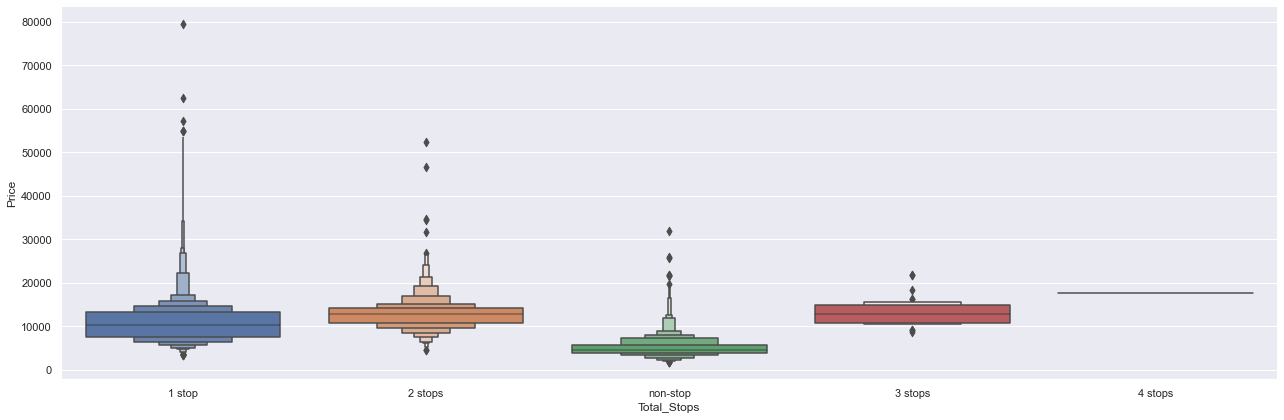

In [43]:
#Price VS Total_stops
sns.catplot(y = "Price", x = "Total_Stops", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [44]:
Destination=train_data[["Destination"]]
Destination=pd.get_dummies(Destination)
Destination.head()

,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1


In [45]:
train_data["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [46]:
train_data.drop(["Route","Additional_Info"],axis = 1,inplace=True)

In [47]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_Min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [48]:
train_data["Total_Stops"].value_counts()
train_data

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_Min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,non-stop,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,non-stop,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,non-stop,12648,1,3,11,30,14,10,2,40


In [49]:
train_data.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops": 4},inplace=True)

In [50]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_Min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [51]:
data_train=pd.concat([train_data,Airline,Source,Destination],axis=1)

In [52]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_Min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [53]:
data_train.drop(["Airline","Source","Destination"],axis=1,inplace=True)

In [54]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_Min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [55]:
data_train.shape

(10682, 33)

In [56]:
#Splitting the data into train and test


y=data_train['Price']
x=data_train.drop('Price',axis=1)
#train-test split
from sklearn.model_selection import train_test_split
#here 30% is test data and remaining is train data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

x_test
y_train
x


,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_Min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9,4,19,55,22,25,2,30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
10679,0,27,4,20,45,23,20,2,35,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
10680,0,27,4,8,20,11,20,3,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
10681,0,1,3,11,30,14,10,2,40,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1


In [57]:
len(x_train)

7477

In [58]:
print(y.shape)

(10682,)


In [59]:
len(x_test)

3205

In [60]:
x_train

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_Min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
749,0,27,6,10,20,11,50,1,30,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
6077,0,21,6,17,10,19,40,2,30,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2373,1,27,5,15,0,1,30,10,30,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2442,1,9,5,22,40,10,40,12,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
5402,2,9,6,19,45,19,15,23,30,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1,27,3,9,0,4,25,19,25,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
5191,1,9,5,14,5,20,45,6,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
5390,1,15,5,12,50,1,30,12,40,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
860,0,3,3,0,40,3,25,2,45,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [61]:
y_train

749      8040
6077     3873
2373    13377
2442     5192
5402     9968
        ...  
5734    12242
5191    10844
5390     7670
860      6144
7270    10262
Name: Price, Length: 7477, dtype: int64

# LINEAR REGRESSION


In [62]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred
model.score(x_train,y_train)


0.6216950251455393

In [63]:
#Accuracy (e.g. classification accuracy) is a measure for classification, not regression so we can't calculate accuracy 
#for a regression model. For regression, one of the matrices we've to get the score (ambiguously termed as accuracy) is R-squared (R2)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6263921402248538

In [64]:
from math import sqrt
from sklearn import metrics
print("MAE:", metrics. mean_absolute_error(y_test,y_pred))
print("MSE:", metrics.mean_squared_error(y_test,y_pred))
print("RSME:" ,sqrt(metrics.mean_squared_error(y_test,y_pred)))



MAE: 1937.8989872881193
MSE: 7621946.516730602
RSME: 2760.7873001610615


# RandomForestRregressor

In [65]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [66]:
y_pred_r=model.predict(x_test)
y_pred_r

array([16705.53,  5806.5 ,  8905.07, ...,  5885.98,  3307.83,  7076.97])

In [67]:
model.score(x_train,y_train)

0.9535347431676466

In [68]:
x_train
x_test

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_Min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
6075,2,21,5,15,5,1,30,10,25,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3544,1,3,6,10,35,19,35,9,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
9291,1,9,5,20,20,9,5,12,45,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0
5032,0,24,5,14,45,17,5,2,20,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2483,1,21,5,22,50,4,25,5,35,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7917,2,1,6,20,0,4,25,8,25,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
5858,1,9,6,16,30,23,35,7,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2689,0,12,5,14,25,17,40,3,15,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4486,0,9,5,21,5,22,25,1,20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [69]:
from sklearn import metrics
print("MAE:", metrics. mean_absolute_error(y_test,y_pred_r))
print("MSE:", metrics.mean_squared_error(y_test,y_pred_r))
print("RSME:" ,sqrt(metrics.mean_squared_error(y_test,y_pred_r)))



MAE: 1161.491533269175
MSE: 4003422.654413532
RSME: 2000.855480641601


In [70]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_r)

0.8037627046571888

In [71]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred_r})
df

,Real Values,Predicted Values
6075,16655,16705.530000
3544,4959,5806.500000
9291,9187,8905.070000
5032,3858,3724.920000
2483,12898,15045.665167
...,...,...
7917,16263,14422.673333
5858,10844,13161.813429
2689,5000,5885.980000
4486,3100,3307.830000


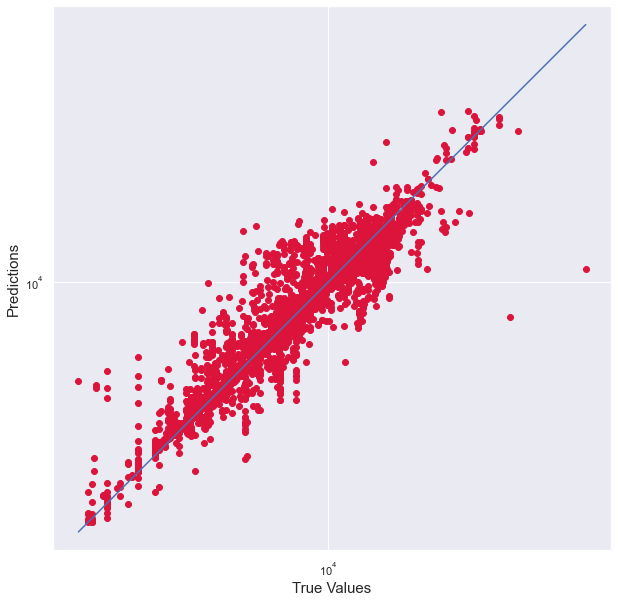

In [72]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,y_pred_r, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred_r), max(y_test))
p2 = min(min(y_pred_r), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

C:\Users\matap\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


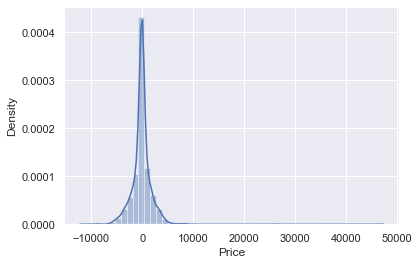

In [73]:
sns.distplot(y_test-y_pred_r)
plt.show()

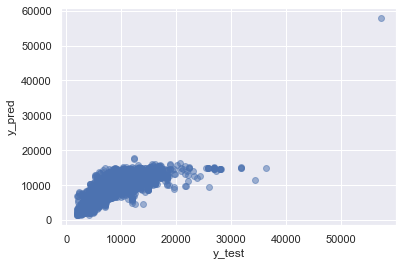

In [74]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [75]:
#r2_square
metrics.r2_score(y_test,y_pred_r)

0.8037627046571888

# DescisonTreeRegressor

In [76]:
#Desscion tree regressor
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)


DecisionTreeRegressor()

In [77]:
y_pred_d=regressor.predict(x_test)

In [78]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred_d})
df

,Real Values,Predicted Values
6075,16655,16840.0
3544,4959,4959.0
9291,9187,8452.0
5032,3858,3858.0
2483,12898,16079.0
...,...,...
7917,16263,15318.0
5858,10844,10844.0
2689,5000,5601.0
4486,3100,3100.0


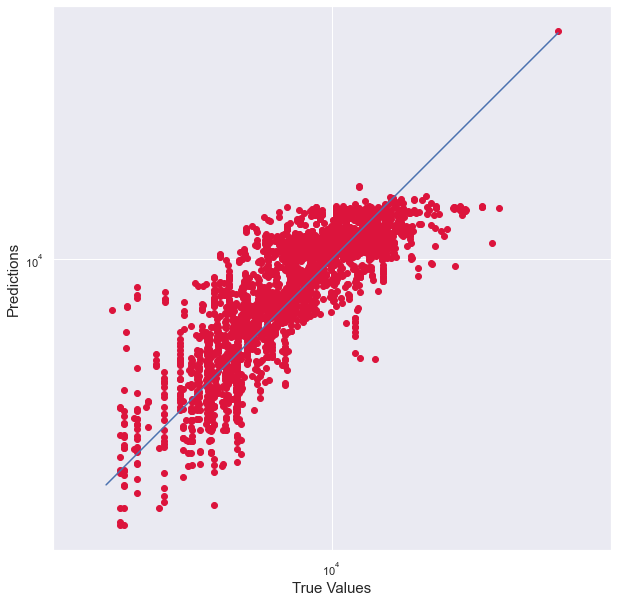

In [79]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred_d), max(y_test))
p2 = min(min(y_pred_d), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [80]:
regressor.score(x_train,y_train)

0.9729700065222148

In [81]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_d)


0.7000249501359975

In [82]:
from sklearn import metrics
print("MAE:", metrics. mean_absolute_error(y_test,y_pred_d))
print("MSE:", metrics.mean_squared_error(y_test,y_pred_d))
print("RSME:" ,sqrt(metrics.mean_squared_error(y_test,y_pred_d)))

MAE: 1363.261861674467
MSE: 6119768.967904143
RSME: 2473.8166803350937


# KNeighboursRegressor 

In [83]:
from sklearn.neighbors import KNeighborsRegressor
>>> neigh = KNeighborsRegressor(n_neighbors=10)
>>> neigh.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [84]:
y_pred_n =neigh.predict(x_test) 
y_pred_n

array([14360.7,  7400.8, 10325.3, ...,  6378. ,  4140.4,  6116.6])

In [85]:
r2_score(y_test,y_pred_n)

0.5404414505471757

In [86]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred_n})
df

,Real Values,Predicted Values
6075,16655,14360.7
3544,4959,7400.8
9291,9187,10325.3
5032,3858,6289.2
2483,12898,12967.2
...,...,...
7917,16263,17434.4
5858,10844,12466.0
2689,5000,6378.0
4486,3100,4140.4


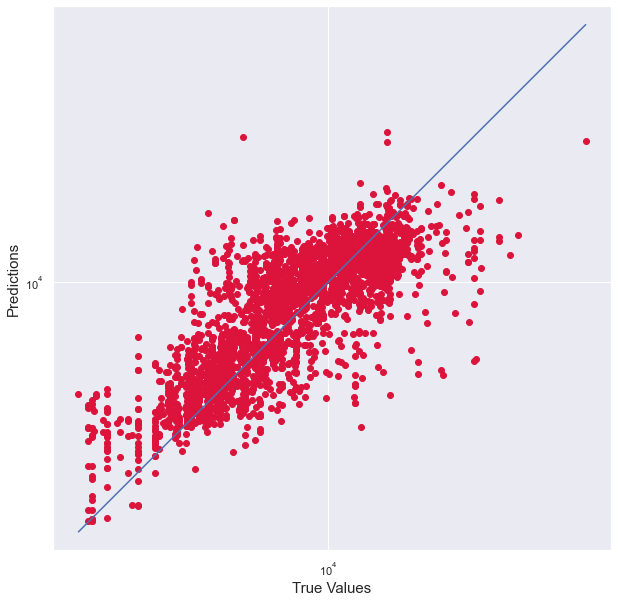

In [87]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,y_pred_n, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred_n), max(y_test))
p2 = min(min(y_pred_n), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [88]:
from sklearn import metrics
print("MAE:", metrics. mean_absolute_error(y_test,y_pred_n))
print("MSE:", metrics.mean_squared_error(y_test,y_pred_n))
print("RSME:" ,sqrt(metrics.mean_squared_error(y_test,y_pred_n)))

MAE: 2034.203088923557
MSE: 9375420.226287052
RSME: 3061.930800375321


# GradientBoostingRegressor

In [89]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=0)
reg.fit(x_train, y_train)
GradientBoostingRegressor(random_state=0)


GradientBoostingRegressor(random_state=0)

In [120]:
y_pred_g=reg.predict(x_test)
y_pred.shape

(3205,)

In [91]:
reg.score(x_train,y_train)

0.7876034186239044

In [92]:
reg.score(x_test,y_test)

0.7923731693265277

In [93]:
r2_score(y_test,y_pred_g)

0.7923731693265277

In [94]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred_g})
df.head()

,Real Values,Predicted Values
6075,16655,15643.114799
3544,4959,7473.143138
9291,9187,9654.310370
5032,3858,4491.948332
2483,12898,11930.097941


In [95]:
from sklearn import metrics
print("MAE:", metrics. mean_absolute_error(y_test,y_pred_g))
print("MSE:", metrics.mean_squared_error(y_test,y_pred_g))
print("RSME:" ,sqrt(metrics.mean_squared_error(y_test,y_pred_g)))

MAE: 1476.4178969928294
MSE: 4235779.728466949
RSME: 2058.101000550495


# XGBOOST Regressor


In [96]:
from xgboost import XGBRegressor
xgbr=XGBRegressor()
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
xgbr.fit(x_train,y_train)
score=xgbr.score(x_train,y_train)
print("Training data:",score)

Training data: 0.9388045386786862


In [123]:
y_xgbr=xgbr.predict(x_test)
y_xgbr.shape


(3205,)

In [98]:
metrics.r2_score(y_test,y_xgbr)

0.8445970750696522

In [99]:
from sklearn import metrics
print("MAE:", metrics. mean_absolute_error(y_test,y_xgbr))
print("MSE:", metrics.mean_squared_error(y_test,y_xgbr))
print("RSME:" ,sqrt(metrics.mean_squared_error(y_test,y_xgbr)))

MAE: 1151.2378344079075
MSE: 3170363.661716004
RSME: 1780.5515049321107


In [100]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_xgbr})
df

,Real Values,Predicted Values
6075,16655,16770.550781
3544,4959,5849.847168
9291,9187,8392.007812
5032,3858,3923.142578
2483,12898,14292.812500
...,...,...
7917,16263,14665.689453
5858,10844,12593.700195
2689,5000,5879.182129
4486,3100,2841.503174


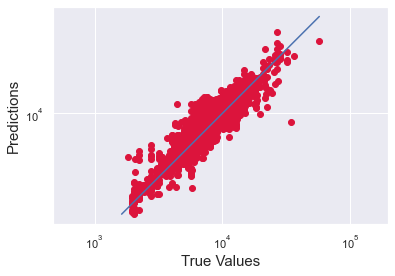

In [101]:
#plt.figure(figsize=(10,10))
plt.scatter(y_test,y_xgbr, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_xgbr), max(y_test))
p2 = min(min(y_xgbr), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

# R2_scores of Each Algorithm

In [102]:
print("LinearRegressor score  =  0.6263921402248538 ")
print("RandomForestRregressor score = 0.801922084909868")
print("DescisonTreeRegressor score =0.7044793608758034")
print("KNeighboursRegressor score = 0.7700951183783893")
print("GradientBoostingRegressor score =  0.7923731693265277")
print("XGBOOSTRegressor score =  0.8445970750696522")

LinearRegressor score  =  0.6263921402248538 
RandomForestRregressor score = 0.801922084909868
DescisonTreeRegressor score =0.7044793608758034
KNeighboursRegressor score = 0.7700951183783893
GradientBoostingRegressor score =  0.7923731693265277
XGBOOSTRegressor score =  0.8445970750696522


# PCA - Principal Component Analysis
It is a precursor step to any analysis that we may subject to our dataset. 
The above dataset has decent dimensional feature space consisting of 13 features. 
In such a high-dimensional space, Euclidean distances tend to become inflated and meaningless. 
This can severely impact our algorithms performance. Such a situation demands more data to train our model and 
this problem is called the 'Curse of Dimensionality'.

The PCA algorithm solves this problem by finding out the features that explain the maximum variance.
So, instead of training our models over 32 features we will be training them over 2 features that explain the maximum variance.

In [103]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as np
%matplotlib inline

In [104]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x)
sc=sc.transform(x)
sc


array([[-1.22066609,  1.23728754, -1.46740227, ..., -0.2642058 ,
        -0.19231927,  3.23440464],
       [ 1.74143186, -1.47530729,  0.25028893, ..., -0.2642058 ,
        -0.19231927, -0.30917591],
       [ 1.74143186, -0.53179604,  1.10913453, ..., -0.2642058 ,
        -0.19231927, -0.30917591],
       ...,
       [-1.22066609,  1.59110426, -0.60855667, ..., -0.2642058 ,
        -0.19231927, -0.30917591],
       [-1.22066609, -1.47530729, -1.46740227, ..., -0.2642058 ,
        -0.19231927,  3.23440464],
       [ 1.74143186, -0.53179604,  0.25028893, ..., -0.2642058 ,
        -0.19231927, -0.30917591]])

In [105]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca=PCA(n_components=2)
pca.fit(sc)
x_pca=pca.transform(sc)
sc.shape

(10682, 32)

In [106]:
x_pca.shape

(10682, 2)

In [107]:
print(x_pca)

[[-2.67786673 -1.67276431]
 [ 0.01776984  2.66515016]
 [ 2.89789156  0.05709074]
 ...
 [-1.88274202 -1.29022228]
 [-2.63634227 -1.18502764]
 [ 2.3533917  -0.43613388]]


In [108]:
from sklearn.model_selection import train_test_split
#here 30% is test data and remaining is train data
X_train, X_test, Y_train, Y_test = train_test_split(x_pca, y, test_size = 0.3, random_state = 42)


# LinearRegression WITH PCA

In [109]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
y_pred_Li=model.predict(X_test)
y_pred_Li
model.score(X_train,Y_train)
model.score(X_test,Y_test)


0.3029366242514775

In [110]:
metrics.r2_score(y_test,y_pred_Li)

0.3029366242514775

# Randomforest with PCA

In [111]:


from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train,Y_train)
y_pred_R=model.predict(X_test)
y_pred_R
model.score(X_train,Y_train)
model.score(X_test,Y_test)
metrics.r2_score(Y_test,y_pred_R)


0.46347272951239327

# DecsisonTee with PCA

In [112]:
from sklearn.tree import DecisionTreeRegressor
d = DecisionTreeRegressor()
d.fit(X_train, Y_train)
Y_PRED=d.predict(X_test)


In [113]:
metrics.r2_score(Y_test,Y_PRED)

0.11929897444326631

In [114]:
from math import sqrt
from sklearn import metrics
print("MAE:", metrics. mean_absolute_error(Y_test,Y_PRED))
print("MSE:", metrics.mean_squared_error(Y_test,Y_PRED))
print("RSME:" ,sqrt(metrics.mean_squared_error(Y_test,Y_PRED)))

MAE: 2643.037602704108
MSE: 17967116.960717022
RSME: 4238.76361227151


# KNeighbours with PCA

In [115]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
PCA=PCA(n_components=2)
PCA.fit(sc)
x_pca=PCA.transform(sc)
from sklearn.neighbors import KNeighborsRegressor
N = KNeighborsRegressor(n_neighbors=5)
N.fit(X_train, Y_train)

KNeighborsRegressor()

In [117]:
pred=N.predict(X_test)

In [118]:
metrics.r2_score(Y_test,pred)

0.5149044841215584

# GradientBoosting with PCA

In [124]:
from sklearn.ensemble import GradientBoostingRegressor
gb= GradientBoostingRegressor(random_state=0)
gb.fit(X_train, Y_train)



GradientBoostingRegressor(random_state=0)

In [125]:
gb.fit(X_train,Y_train)
gb_pred=gb.predict(X_test)


In [126]:
metrics.r2_score(Y_test,gb_pred)

0.5182243387798897

# XGBOOSTING With PCA

In [127]:
from xgboost import XGBRegressor
xg=XGBRegressor()
xg.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [128]:
xg_pred=xg.predict(X_test)
metrics.r2_score(Y_test,xg_pred)

0.49493331591688183

# Save and loading the model Using XGBOOST REGRESSOR

In [149]:
import pickle
filename = 'model.pkl'
pickle.dump(xgbr, open(filename, 'wb'))

In [150]:
model = open(filename,'rb')
loaded_model= pickle.load(model)

In [154]:
prediction=loaded_model.predict(x_test)

In [165]:
metrics.r2_score(y_test,prediction)

0.8445970750696522

In [ ]:
data_train